
Claves del archivo .mat:
dict_keys(['__header__', '__version__', '__globals__', 'subject', 'exercise', 'emg', 'acc', 'gyro', 'mag', 'glove', 'stimulus', 'repetition', 'restimulus', 'rerepetition'])


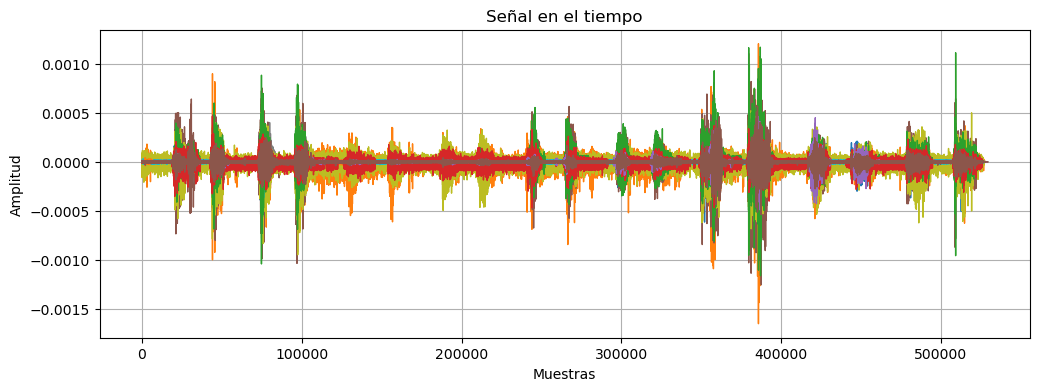

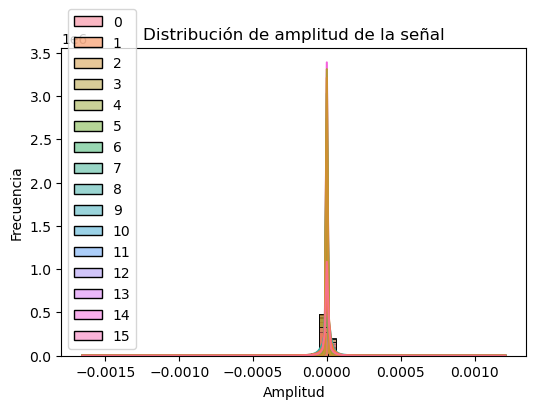

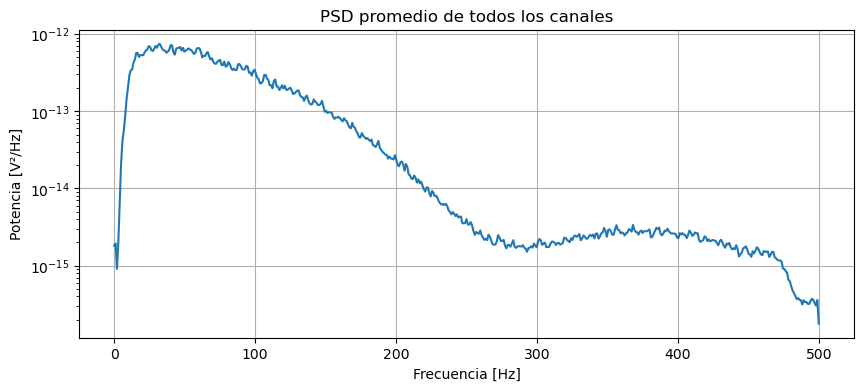

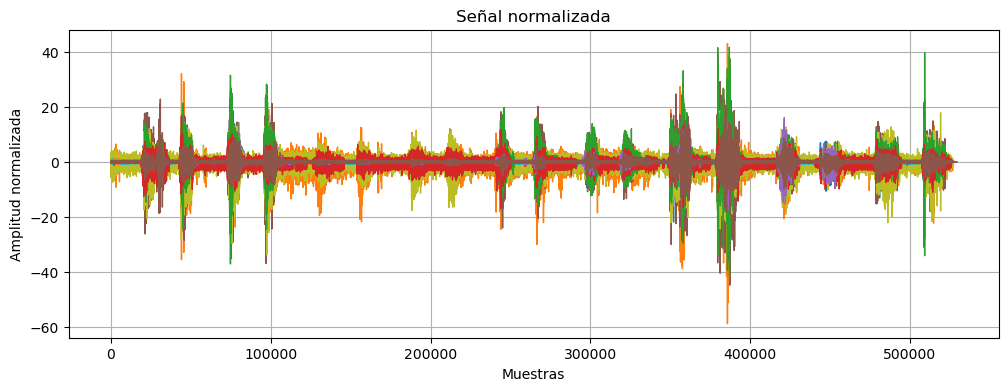

In [3]:

# Importamos las librerías necesarias
import scipy.io as sio       # Para leer archivos .mat de MATLAB
import numpy as np            # Para manejo numérico y arrays
import pandas as pd           # (no se usa mucho aquí, pero útil para estadísticas)
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns         # Para visualizaciones más estéticas
from scipy.signal import welch # Para análisis espectral (densidad de potencia)

# ------------------------------------------------
# 1️⃣ Cargar archivo .mat
# ------------------------------------------------
ruta_archivo = r"C:\Users\RODRIGO\Downloads\S1_E1_A3 (1).mat"  

# Carga el contenido del archivo .mat como un diccionario de Python
data = sio.loadmat(ruta_archivo)

# Muestra las claves (variables) que contiene el archivo
# Esto ayuda a identificar cómo se llama la variable de la señal dentro del archivo
print("\nClaves del archivo .mat:")
print(data.keys())

# Extrae la señal EMG desde el archivo (ajustar el nombre según la clave encontrada)
# .squeeze() elimina dimensiones extra innecesarias (por ejemplo convierte [N,1] a [N])
signal = data['emg'].squeeze()


# ------------------------------------------------
#  Visualización temporal
# ------------------------------------------------
# Grafica la señal EMG tal como fue capturada en función del número de muestra
plt.figure(figsize=(12, 4))
plt.plot(signal, lw=1)  # lw = grosor de la línea
plt.title("Señal en el tiempo")   # Título del gráfico
plt.xlabel("Muestras")            # Eje X representa el índice de cada muestra
plt.ylabel("Amplitud")            # Eje Y es la amplitud (valor de la señal EMG)
plt.grid(True)                    # Activa la cuadrícula para mejor lectura
plt.show()                        # Muestra el gráfico

# ------------------------------------------------
#  Histograma y distribución
# ------------------------------------------------
# Muestra cómo se distribuyen los valores de amplitud de la señal
plt.figure(figsize=(6, 4))
sns.histplot(signal, bins=50, kde=True)  
# 'bins=50' divide el rango de amplitudes en 50 intervalos
# 'kde=True' añade una curva de densidad suavizada (Kernel Density Estimation)
plt.title("Distribución de amplitud de la señal")
plt.xlabel("Amplitud")
plt.ylabel("Frecuencia")
plt.show()

# Este análisis permite ver si la señal está centrada en cero,
# si tiene sesgos, ruido o saturación (valores extremos frecuentes).

# ------------------------------------------------
#  Análisis espectral (densidad de potencia)
# ------------------------------------------------
fs = 1000  # Frecuencia de muestreo [Hz], debes ajustarla según tus datos reales

# Si la señal tiene varios canales (matriz NxM), calculamos el promedio entre canales.
# Esto genera una señal promedio que representa el comportamiento general.
signal_mean = np.mean(signal, axis=1)

# Welch calcula la densidad espectral de potencia (PSD)
# Mide cómo se distribuye la energía de la señal en el dominio de la frecuencia.
f, Pxx = welch(signal_mean, fs=fs, nperseg=1024)

# Gráfico del espectro de potencia (en escala logarítmica)
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx)  # semilogy = escala logarítmica en eje Y (para ver mejor la potencia)
plt.title("PSD promedio de todos los canales")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [V²/Hz]")
plt.grid(True)
plt.show()

# El PSD permite ver en qué bandas de frecuencia se concentra la energía de la señal EMG.
# Por ejemplo, en EMG suele estar entre 20 y 500 Hz.

# ------------------------------------------------
#  Señal normalizada (opcional)
# ------------------------------------------------
# Normaliza la señal para tener media 0 y desviación estándar 1
# Esto permite comparar diferentes registros en la misma escala.
signal_norm = (signal - np.mean(signal)) / np.std(signal)

# Gráfico de la señal normalizada
plt.figure(figsize=(12, 4))
plt.plot(signal_norm, lw=1)
plt.title("Señal normalizada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud normalizada")
plt.grid(True)
plt.show()

# La normalización es útil cuando se quieren aplicar algoritmos de análisis o clasificación,
# ya que evita que las diferencias de escala afecten los resultados.

 # Link de Drive con video y presentación: https://drive.google.com/drive/folders/1W9a8w--ykRO4A00GF_krSEC6iazfzZej?usp=sharing